<h1 align='center'>Netflix: Movies and TV Shows</h1>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.gizmozones.com/wp-content/uploads/2019/07/netflix-icon-wallpaper-66504-68771-hd-wallpapers.jpg")

# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:** 
 - Deleting redundant columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    - Type: Movie and TV Shows
    - Rating
    - Relation between Type and Rating
5. **Word Cloud**
    - Country
    - Cast
    - Director
    - Category

### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Loading the Dataset

In [3]:
netflix=pd.read_csv('netflix_titles_nov_2019.csv')

#### First 10 values

In [4]:
netflix.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


#### Shape of the dataset

In [5]:
netflix.shape

(5837, 12)

#### Print the name of columns

In [6]:
netflix.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

#### Check for NULL Values

In [7]:
netflix.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

#### Check unique values

In [8]:
netflix.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

#### Check for Duplicate values

In [9]:
netflix.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [10]:
df = netflix.copy()

In [11]:
df.shape

(5837, 12)

#### Drop NULL values

In [12]:
df=df.dropna()
df.shape

(3447, 12)

#### Print first 10 values

In [13]:
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
10,81172899,Payday,Cheta Chukwu,"Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola...",Nigeria,"November 29, 2019",2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...","After an expensive night out, two flatmates ge...",Movie
12,81172908,The Accidental Spy,Roger Russell,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Nigeria,"November 29, 2019",2017,TV-14,104 min,"Action & Adventure, Comedies, International Mo...","Nursing a broken heart, an IT specialist moves...",Movie
14,81172901,The Island,Toka McBaror,"Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, ...",Nigeria,"November 29, 2019",2018,TV-14,93 min,"Dramas, International Movies, Thrillers",When a colonel uncovers controversial intel ab...,Movie
16,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,"November 28, 2019",2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie
21,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States","November 28, 2019",2001,R,124 min,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie


#### Convert Date Time format

In [14]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [15]:
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,day_added,year_added,month_added
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,30,2019,11
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,29,2019,11
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,29,2019,11
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,29,2019,11
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,2019-11-29,2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,29,2019,11
10,81172899,Payday,Cheta Chukwu,"Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola...",Nigeria,2019-11-29,2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...","After an expensive night out, two flatmates ge...",Movie,29,2019,11
12,81172908,The Accidental Spy,Roger Russell,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Nigeria,2019-11-29,2017,TV-14,104 min,"Action & Adventure, Comedies, International Mo...","Nursing a broken heart, an IT specialist moves...",Movie,29,2019,11
14,81172901,The Island,Toka McBaror,"Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, ...",Nigeria,2019-11-29,2018,TV-14,93 min,"Dramas, International Movies, Thrillers",When a colonel uncovers controversial intel ab...,Movie,29,2019,11
16,81033086,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019-11-28,2019,TV-PG,94 min,"Children & Family Movies, Dramas",A widowed radio DJ and his four spoiled kids n...,Movie,28,2019,11
21,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States",2019-11-28,2001,R,124 min,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie,28,2019,11


# Data Visualization

### Type: Movie and TV Shows

Text(0.5, 1.0, 'Type')

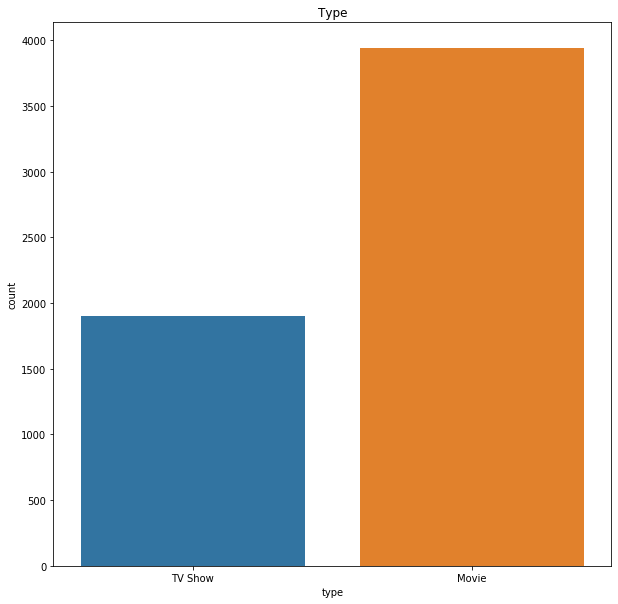

In [16]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

### Rating of shows and movies

Text(0.5, 1.0, 'Rating')

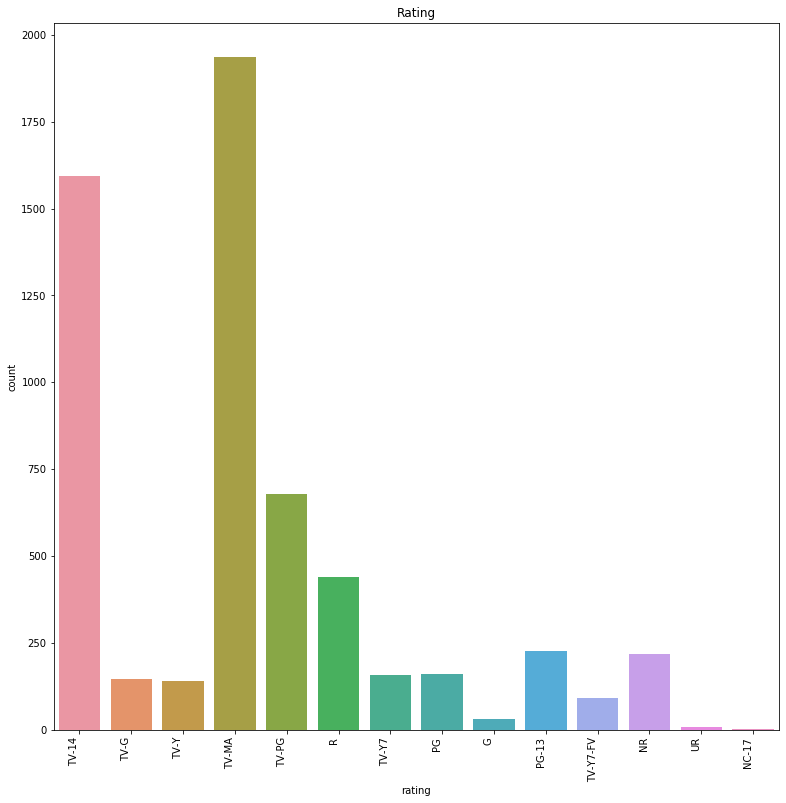

In [17]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

### Relation between Type and Rating

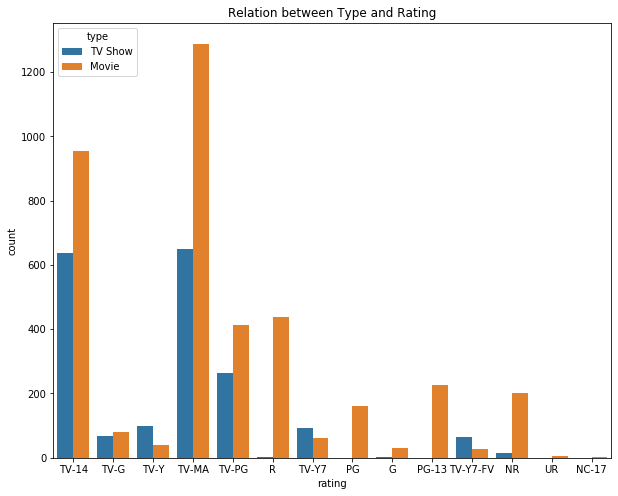

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

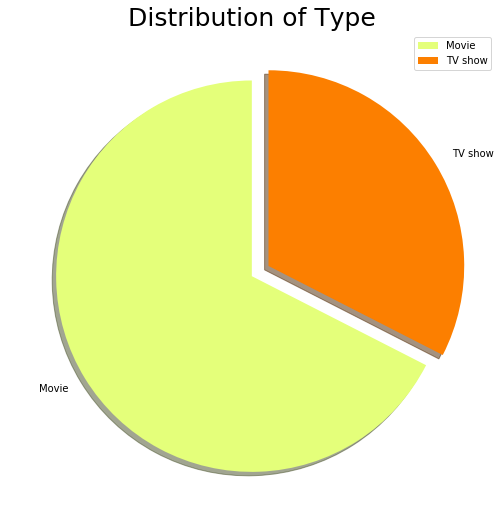

In [19]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

### Pie-chart for Rating

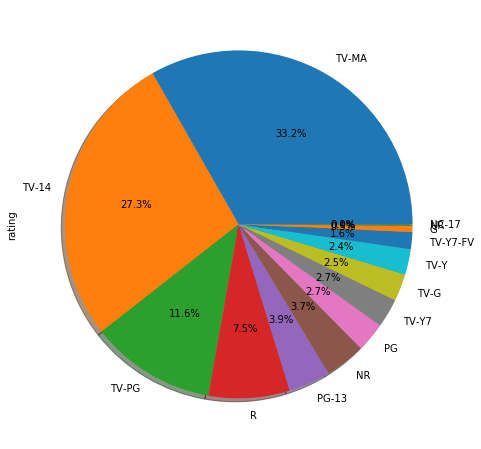

In [20]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# WordCloud

In [28]:
from wordcloud import WordCloud

## Country

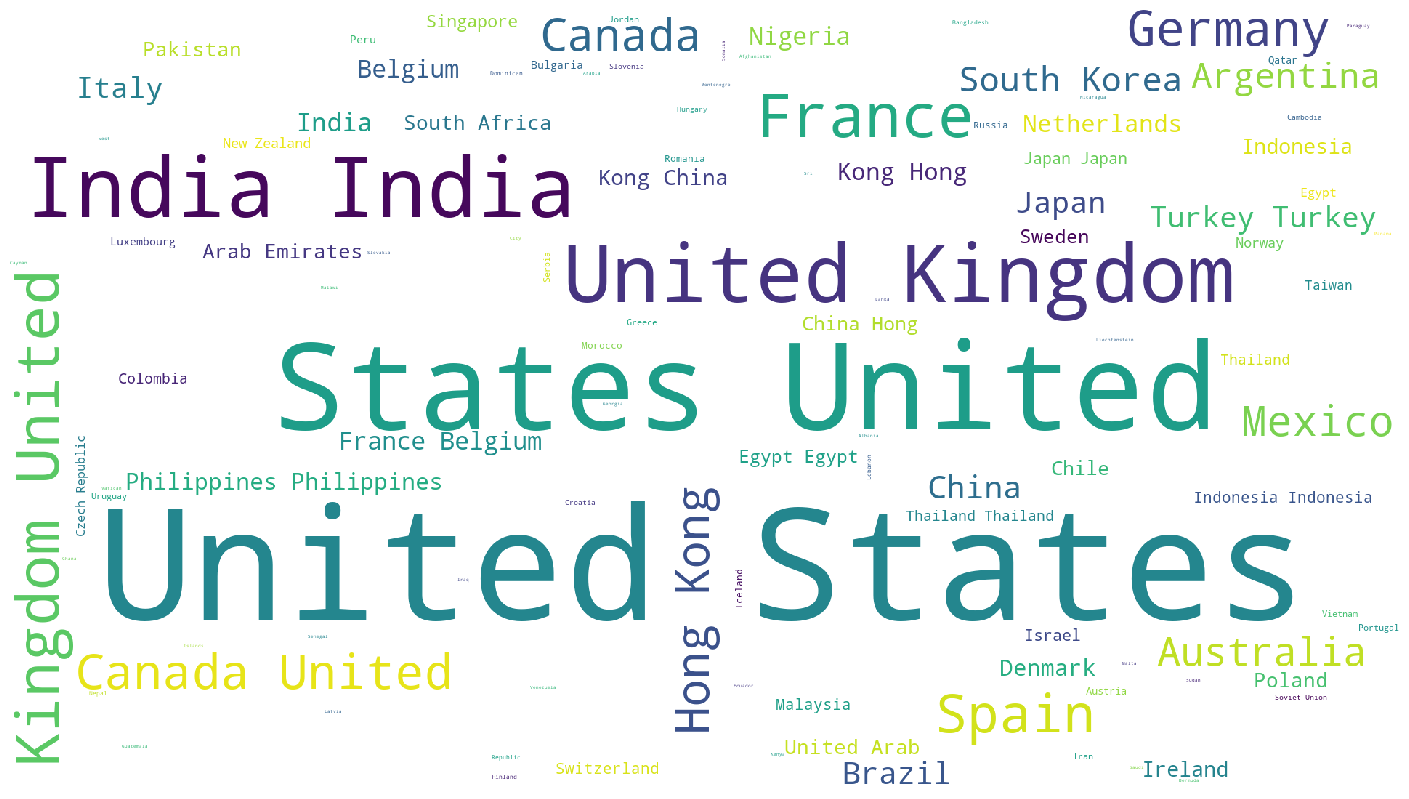

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## Cast in the Shows

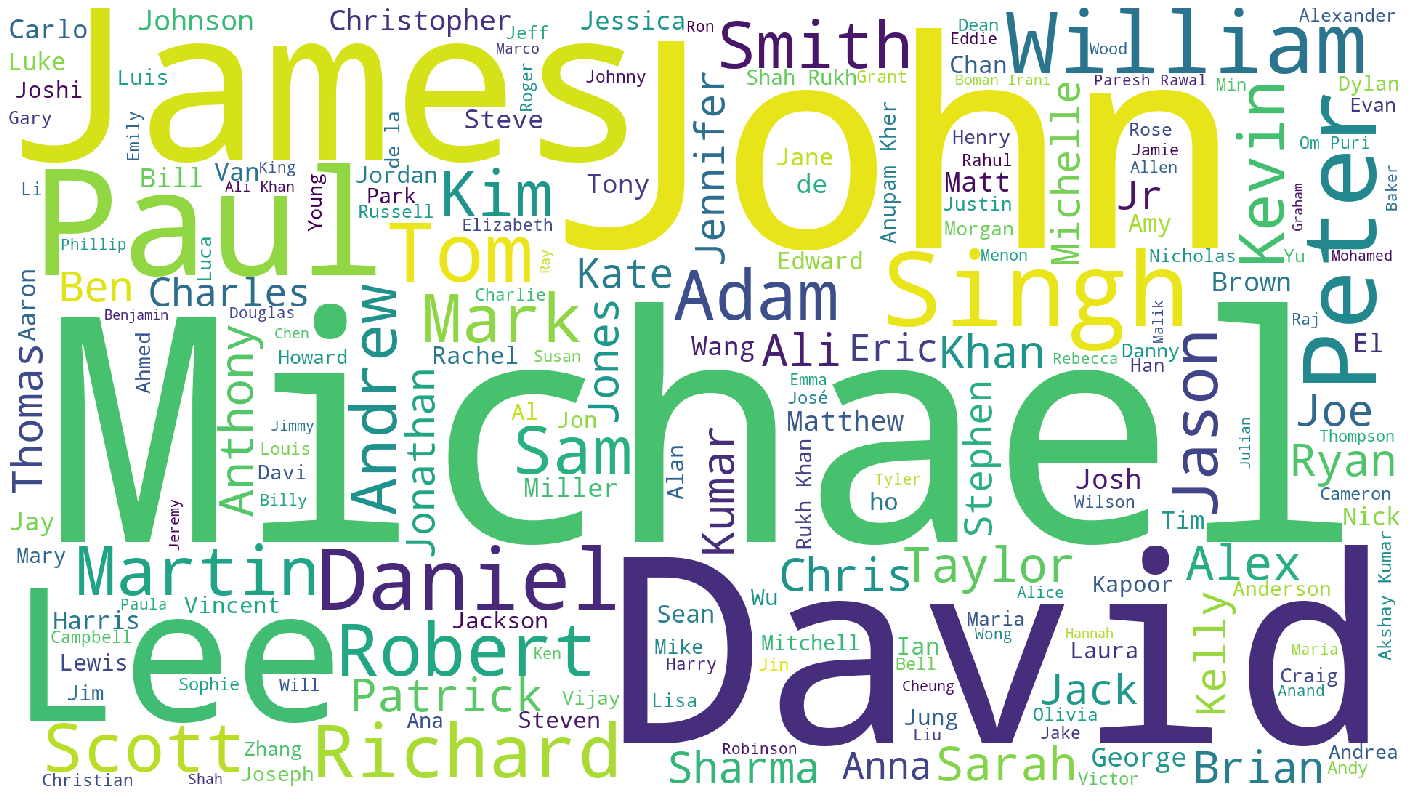

In [30]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

## Directors

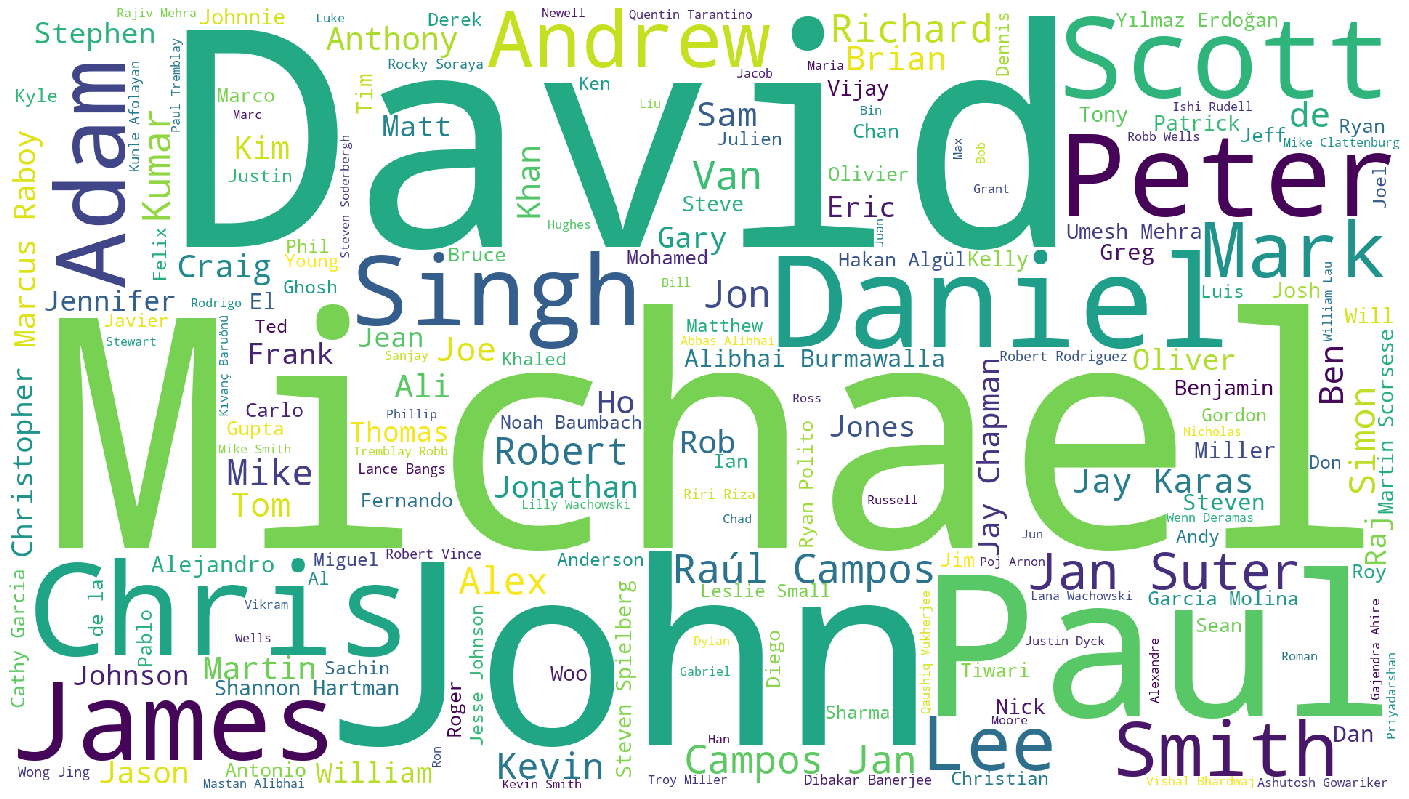

In [31]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

## Categories

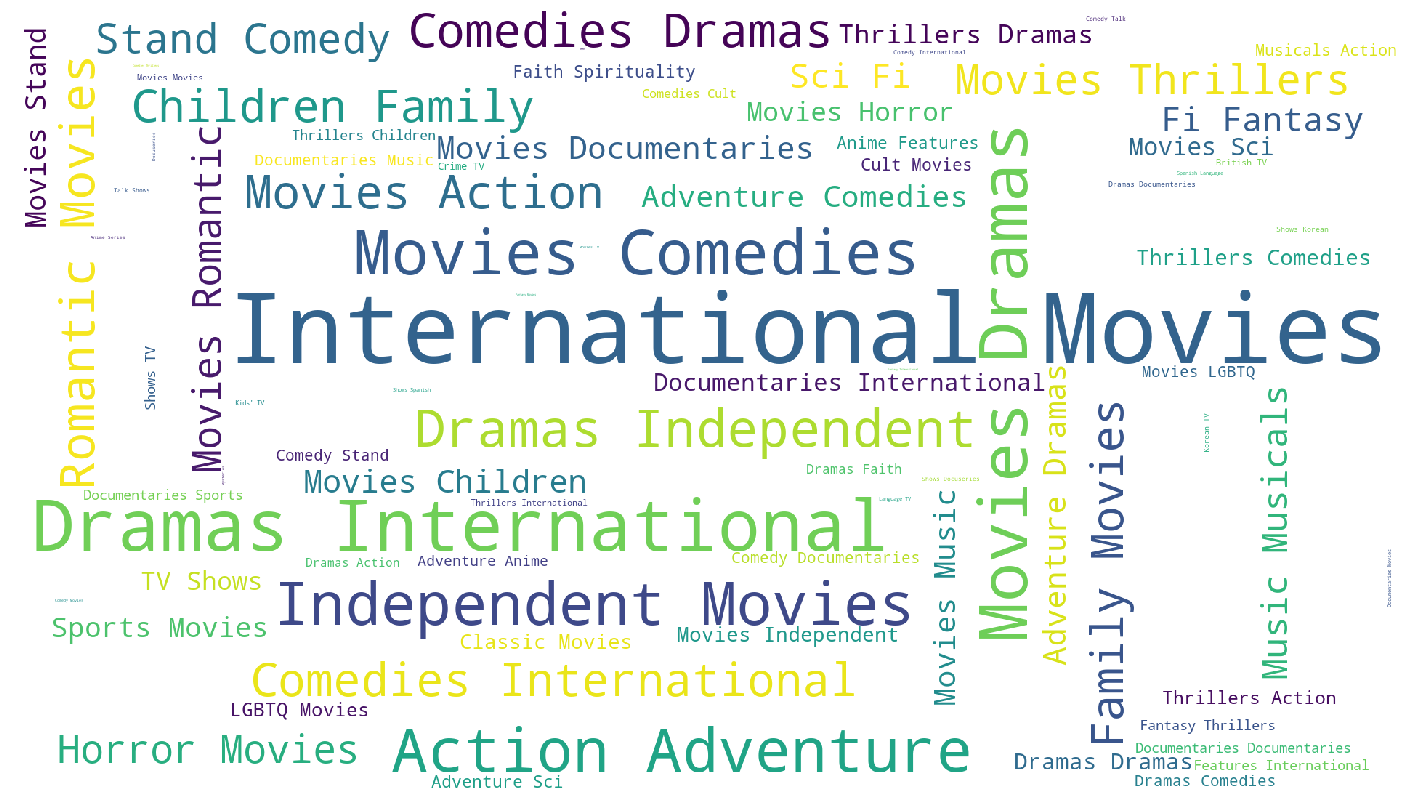

In [32]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

### End of the Notebook